In [1]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances
import seaborn as sns
from pyclustering.cluster.xmeans import xmeans

data = pd.read_csv('../DATASET/Hasil_Gabungan.csv')

In [2]:
features1 = ['Residential_2021', 'Business_2021', 'Industrial_2021', 'Social_2021', 'Gov_Office_2021', 'Pub_Street_2021', 'Total_2021', 'JP_2021', 'KP_2021']

data_2021 = data[features1]
provinces = data['Province'].tolist()

scaler = RobustScaler()
scaled_features = scaler.fit_transform(data_2021)
np.random.seed(42)
model = xmeans(scaled_features.tolist(), initial_centers=[[0] * len(scaled_features[0])], max_clusters=10)
model.process()

clusters = model.get_clusters()
centers = model.get_centers()

cluster_provinces = {}
for cluster_idx, cluster in enumerate(clusters):
    cluster_provinces[cluster_idx] = [provinces[i] for i in cluster]

for cluster_idx, provinces_in_cluster in cluster_provinces.items():
    print(f"Cluster {cluster_idx + 1}: {', '.join(provinces_in_cluster)}")



Cluster 1: Aceh, Sumatera Barat, Riau, Sumatera Selatan, Lampung, Sulawesi Selatan, Bali
Cluster 2: Sumatera Utara
Cluster 3: Kep. Riau, Jambi, Bengkulu, Kep. Bangka Belitung, Kalimantan Barat, Kalimantan Selatan, Kalimantan Tengah, Sulawesi Utara, Gorontalo, Sulawesi Tengah, Sulawesi Tenggara, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Nusa Tenggara Barat, Nusa Tenggara Timur, DI Yogyakarta, Kalimantan Timur, Kalimantan Utara
Cluster 4: Jawa Timur, Jawa Tengah, Jawa Barat, Banten, DKI Jakarta


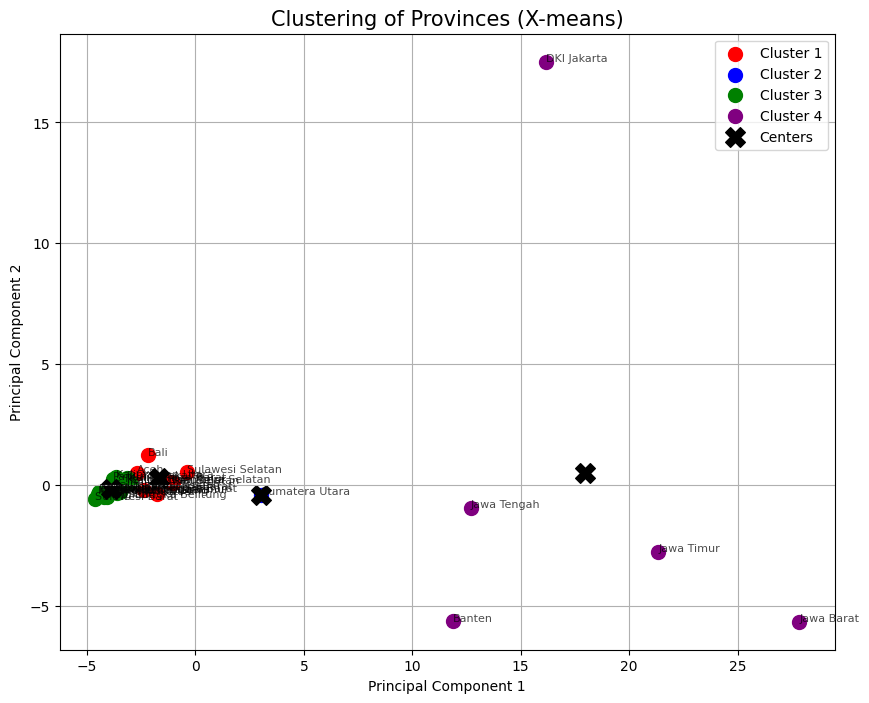

In [3]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)


colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'pink', 'yellow', 'brown', 'gray']


plt.figure(figsize=(10, 8))


for cluster_idx, cluster in enumerate(clusters):
    cluster_data = [reduced_data[i] for i in cluster]
    cluster_provinces = [provinces[i] for i in cluster]

    cluster_data = np.array(cluster_data)
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_idx + 1}", 
                color=colors[cluster_idx % len(colors)], s=100)

    for i, province in enumerate(cluster_provinces):
        plt.text(cluster_data[i, 0], cluster_data[i, 1], province, fontsize=8, alpha=0.7)

centers_2d = pca.transform(centers)
plt.scatter(centers_2d[:, 0], centers_2d[:, 1], color='black', marker='X', s=200, label="Centers")

plt.title('Clustering of Provinces (X-means)', fontsize=15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)


plt.show()


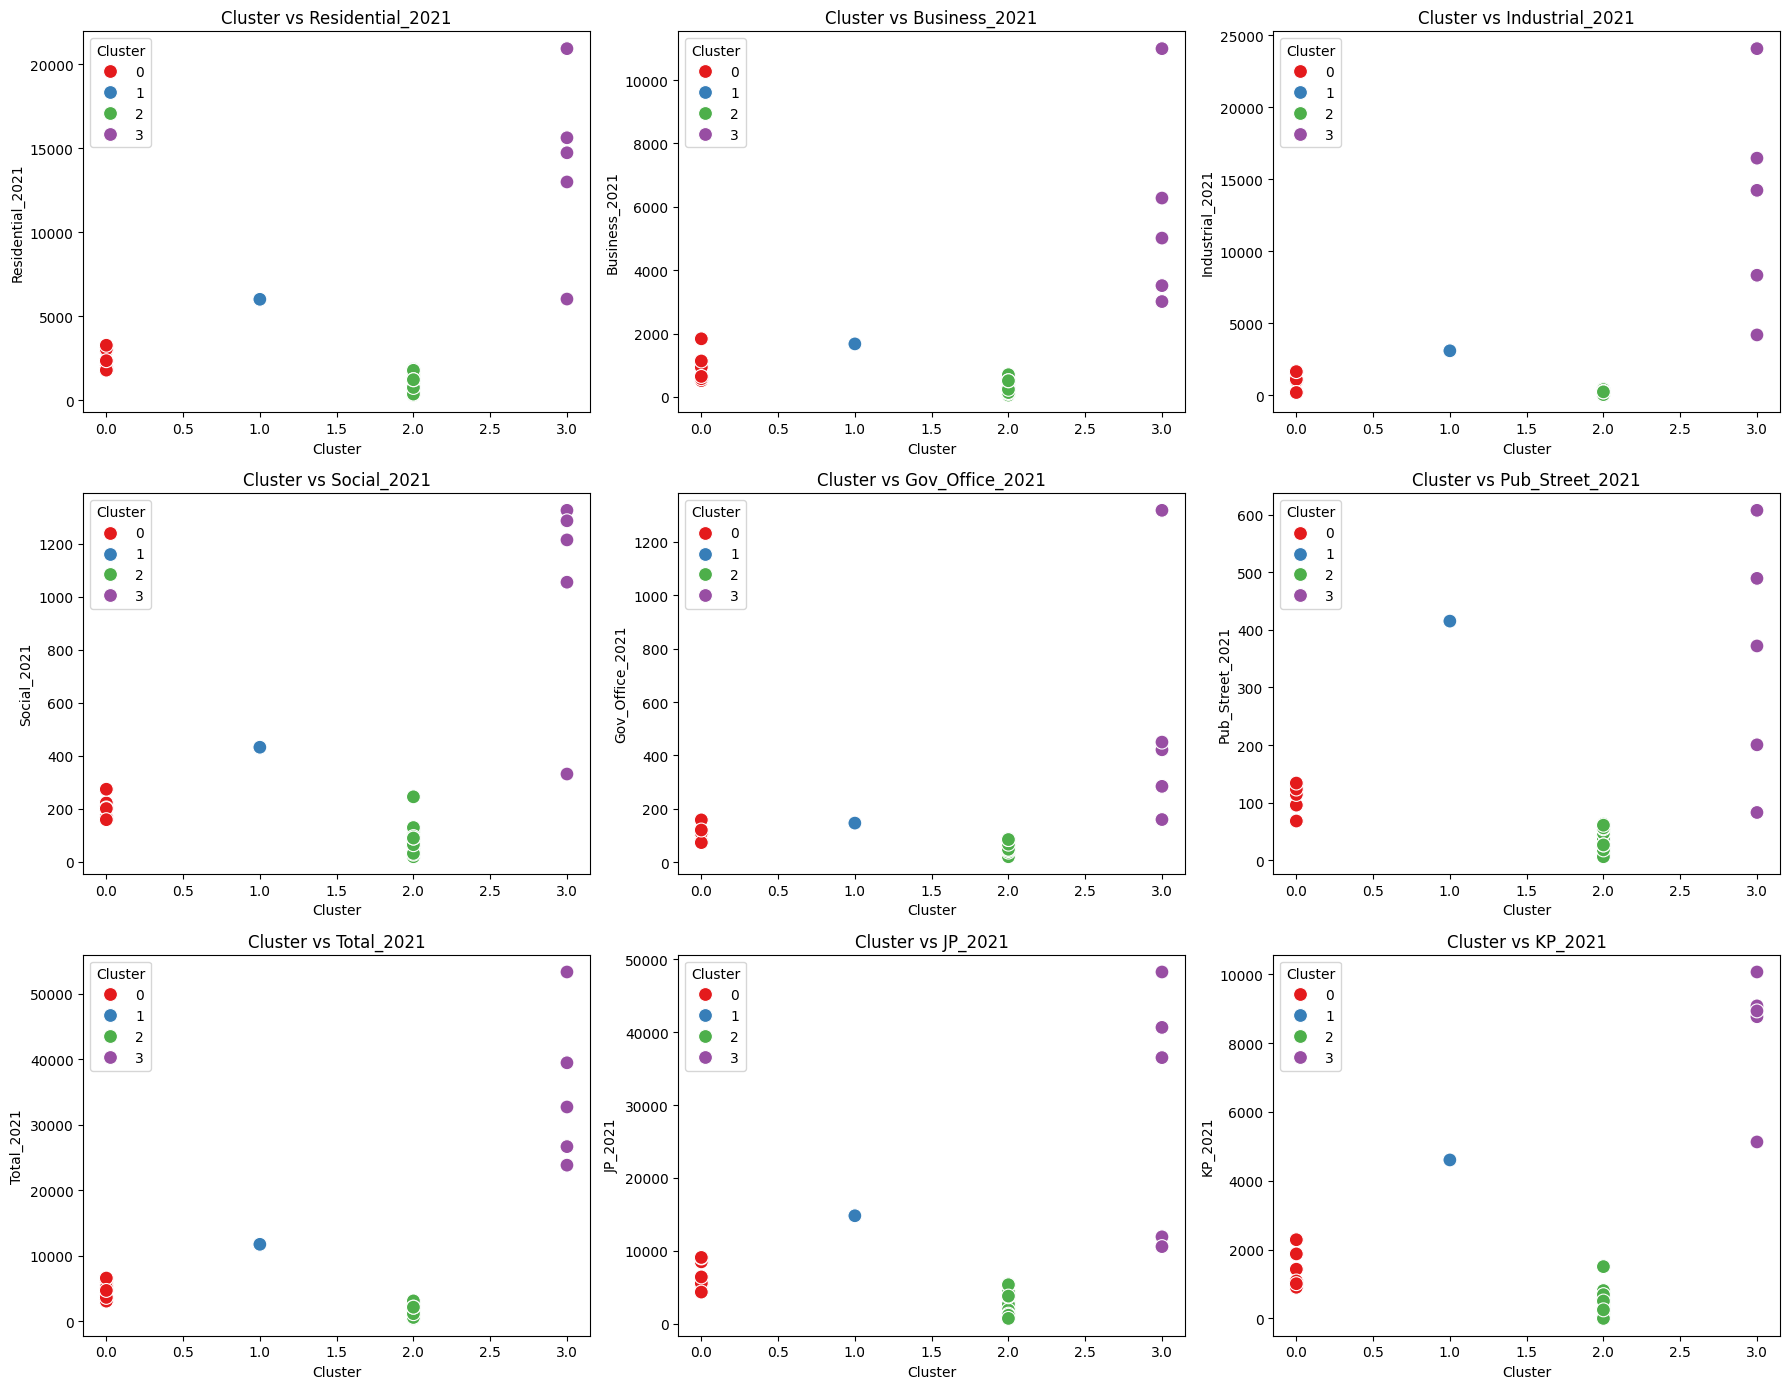

In [4]:
data_final = data.copy()  
data_final['Cluster'] = -1  

for cluster_idx, cluster in enumerate(clusters):
    for idx in cluster:
        data_final.at[idx, 'Cluster'] = cluster_idx

plt.figure(figsize=(18, 14))

for i, feature in enumerate(features1, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(x='Cluster', y=feature, data=data_final, hue='Cluster', palette='Set1', s=100)
    plt.title(f'Cluster vs {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')

plt.tight_layout()
plt.show()


In [10]:
features2 = ['Residential_2022', 'Business_2022', 'Industrial_2022', 'Social_2022', 'Gov_Office_2022', 'Pub_Street_2022', 'Total_2022', 'JP_2022', 'KP_2022']

data_T2022 = data_final[features2]
scaler2 = RobustScaler()
scaled_features2 = scaler2.fit_transform(data_T2022)
np.random.seed(42)
model = xmeans(scaled_features2.tolist(), initial_centers=[[0] * len(scaled_features2[0])], max_clusters=10)
model.process()

clusters2 = model.get_clusters()
centers = model.get_centers()

cluster_provinces = {}
for cluster_idx, cluster in enumerate(clusters2):
    cluster_provinces[cluster_idx] = [provinces[i] for i in cluster]

for cluster_idx, provinces_in_cluster in cluster_provinces.items():
    print(f"Cluster {cluster_idx + 1}: {', '.join(provinces_in_cluster)}")


Cluster 1: Aceh, Sumatera Barat, Kep. Riau, Jambi, Bengkulu, Kep. Bangka Belitung, Kalimantan Barat, Kalimantan Selatan, Kalimantan Tengah, Sulawesi Utara, Gorontalo, Sulawesi Tengah, Sulawesi Tenggara, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Nusa Tenggara Barat, Nusa Tenggara Timur, DI Yogyakarta, Kalimantan Timur, Kalimantan Utara
Cluster 2: Riau, Sumatera Selatan, Lampung, Sulawesi Selatan, Bali
Cluster 3: Sumatera Utara
Cluster 4: Jawa Timur, Jawa Tengah, Jawa Barat, Banten, DKI Jakarta


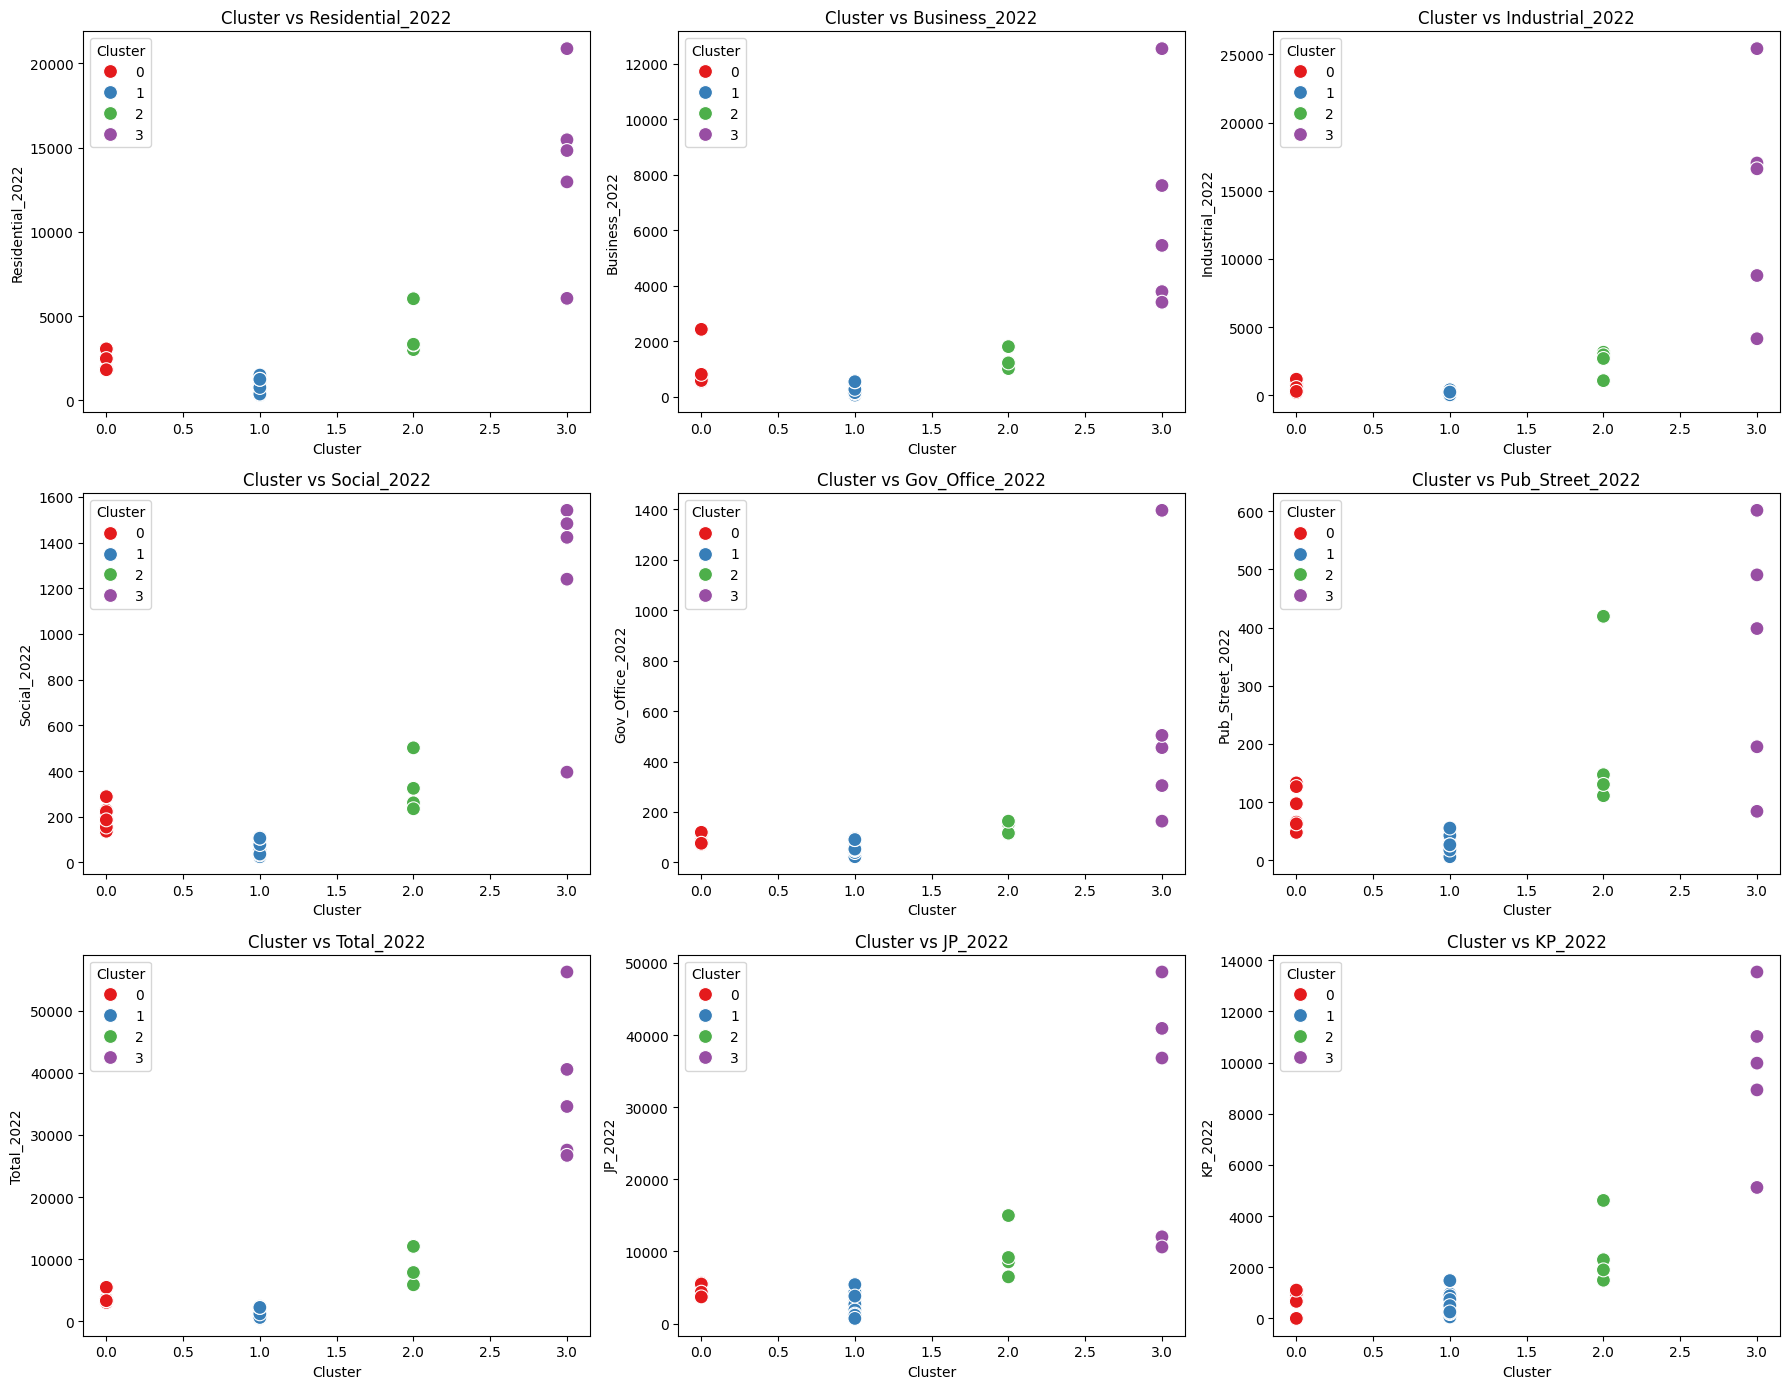

In [6]:
data_final = data.copy()  
data_final['Cluster'] = -1  

for cluster_idx, cluster in enumerate(clusters2):
    for idx in cluster:
        data_final.at[idx, 'Cluster'] = cluster_idx

plt.figure(figsize=(18, 14))

for i, feature in enumerate(features2, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(x='Cluster', y=feature, data=data_final, hue='Cluster', palette='Set1', s=100)
    plt.title(f'Cluster vs {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')

plt.tight_layout()
plt.show()

In [7]:
features3 = ['Residential', 'Business', 'Industrial', 'Social', 'Gov_Office', 'Pub_Street', 'Total', 'JP_2023', 'KP_2023']

data_T2023 = data[features3]

scaler3 = RobustScaler()
scaled_features3 = scaler3.fit_transform(data_T2023)
np.random.seed(42)
model = xmeans(scaled_features3.tolist(), initial_centers=[[0] * len(scaled_features3[0])], max_clusters=10)
model.process()

clusters3 = model.get_clusters()
centers = model.get_centers()

cluster_provinces = {}
for cluster_idx, cluster in enumerate(clusters3):
    cluster_provinces[cluster_idx] = [provinces[i] for i in cluster]

for cluster_idx, provinces_in_cluster in cluster_provinces.items():
    print(f"Cluster {cluster_idx + 1}: {', '.join(provinces_in_cluster)}")

Cluster 1: Sumatera Utara, Riau, Sumatera Selatan, Sulawesi Selatan
Cluster 2: Kep. Riau, Jambi, Bengkulu, Kep. Bangka Belitung, Kalimantan Tengah, Sulawesi Utara, Gorontalo, Sulawesi Tengah, Sulawesi Tenggara, Sulawesi Barat, Maluku, Maluku Utara, Papua, Papua Barat, Nusa Tenggara Timur, Kalimantan Utara
Cluster 3: Aceh, Sumatera Barat, Lampung, Kalimantan Barat, Kalimantan Selatan, Bali, Nusa Tenggara Barat, DI Yogyakarta, Kalimantan Timur
Cluster 4: Jawa Timur, Jawa Tengah, Jawa Barat, Banten, DKI Jakarta


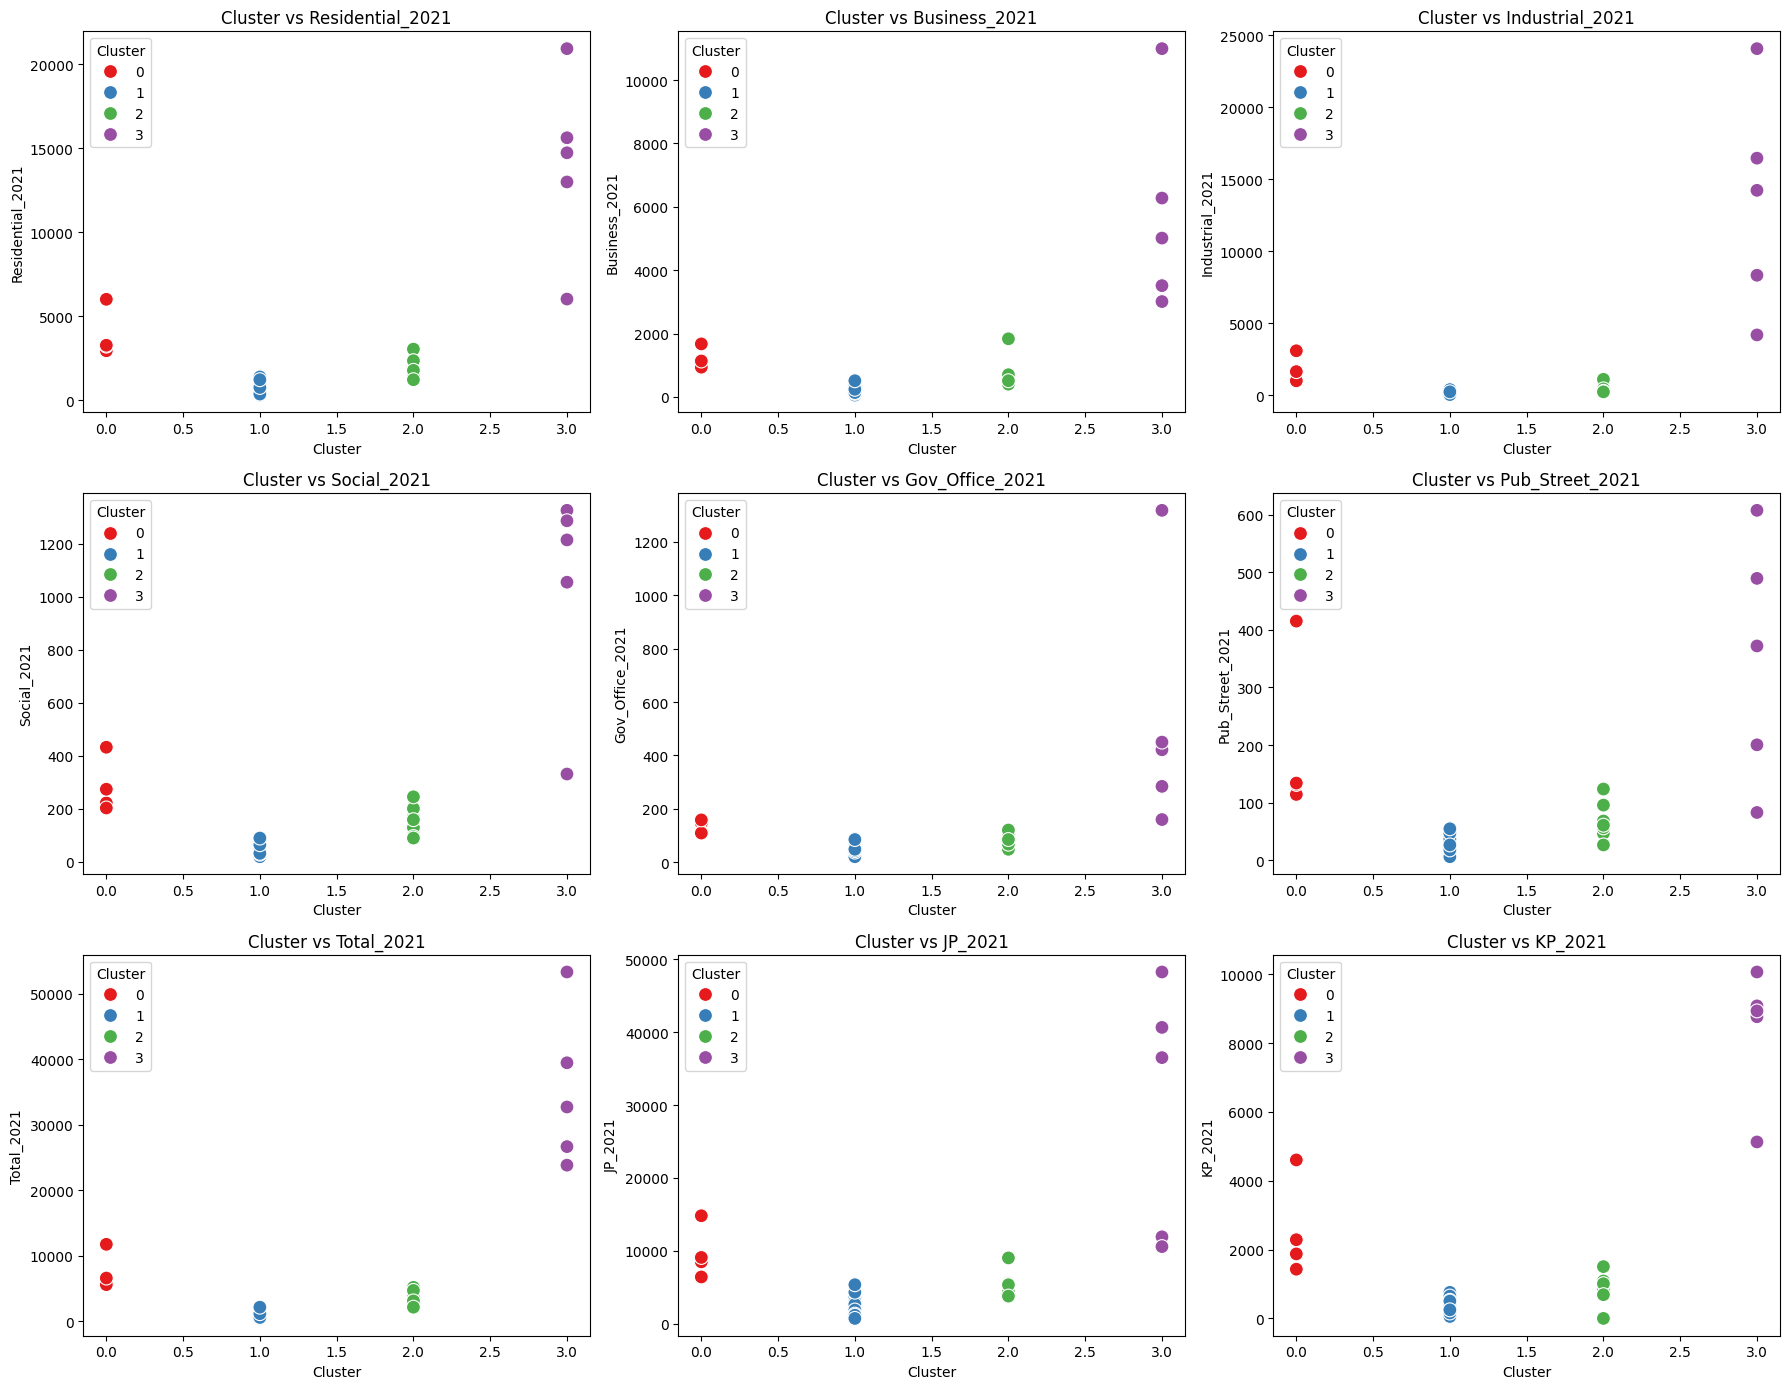

In [8]:
data_final = data.copy()  
data_final['Cluster'] = -1  

for cluster_idx, cluster in enumerate(clusters3):
    for idx in cluster:
        data_final.at[idx, 'Cluster'] = cluster_idx

plt.figure(figsize=(18, 14))

for i, feature in enumerate(features1, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(x='Cluster', y=feature, data=data_final, hue='Cluster', palette='Set1', s=100)
    plt.title(f'Cluster vs {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(f'{feature}')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import silhouette_score
#output oi
def get_cluster_labels(clusters, n_samples):

    labels = np.full(n_samples, -1)  
    
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            labels[sample_idx] = cluster_idx
    return labels

labels_2021 = get_cluster_labels(clusters, len(data_2021))
sil_score_2021 = silhouette_score(scaled_features, labels_2021)
print(f"Silhouette Score untuk 2021: {sil_score_2021}")


labels_2022 = get_cluster_labels(clusters2, len(data_T2022))
sil_score_2022 = silhouette_score(scaled_features2, labels_2022)
print(f"Silhouette Score untuk 2022: {sil_score_2022}")

labels_2023 = get_cluster_labels(clusters3, len(data_T2023))
sil_score_2023 = silhouette_score(scaled_features3, labels_2023)
print(f"Silhouette Score untuk 2023: {sil_score_2023}")


Silhouette Score untuk 2021: 0.4542518757192195
Silhouette Score untuk 2022: 0.35780810264101776
Silhouette Score untuk 2023: 0.35071237624403306
